In [93]:
from typing import Dict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from os import walk
import random


In [4]:
df = pd.read_csv("objects_metadata.csv")

df.head()

,image_filename,split,shape,color,material,size,pixel_coords,3d_coords,image
0,ao_clevr_cube_026006.png,cube,cube,gray,metal,small,"[52, 39, 11.845768928527832]","[-0.7997756004333496, 1.3228751420974731, 0.34...",ao_clevr_cube_026006.png
1,ao_clevr_cube_091063.png,cube,cube,gray,rubber,small,"[62, 55, 9.742987632751465]","[2.3687503337860107, -0.3344546854496002, 0.34...",ao_clevr_cube_091063.png
2,ao_clevr_cylinder_044993.png,cylinder,cylinder,brown,rubber,small,"[63, 47, 10.751688003540039]","[1.2539156675338745, 0.9125927686691284, 0.349...",ao_clevr_cylinder_044993.png
3,ao_clevr_cube_029146.png,cube,cube,brown,metal,large,"[87, 43, 10.785911560058594]","[2.821303606033325, 2.7795522212982178, 0.6999...",ao_clevr_cube_029146.png
4,ao_clevr_cube_029340.png,cube,cube,blue,metal,small,"[20, 44, 11.521142959594727]","[-2.1865415573120117, -2.1958963871002197, 0.3...",ao_clevr_cube_029340.png


In [76]:
def draw_simple_diagram(values, title=None):
    plt.rcdefaults()
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)


    ax.barh(list(values.keys()), list(values.values()), align='center')

    if title is not None:
        ax.set_title(title)

    for i, (k, v) in enumerate(values.items()):
        ax.text(v//2, i, str(v), color='black')

    plt.show()

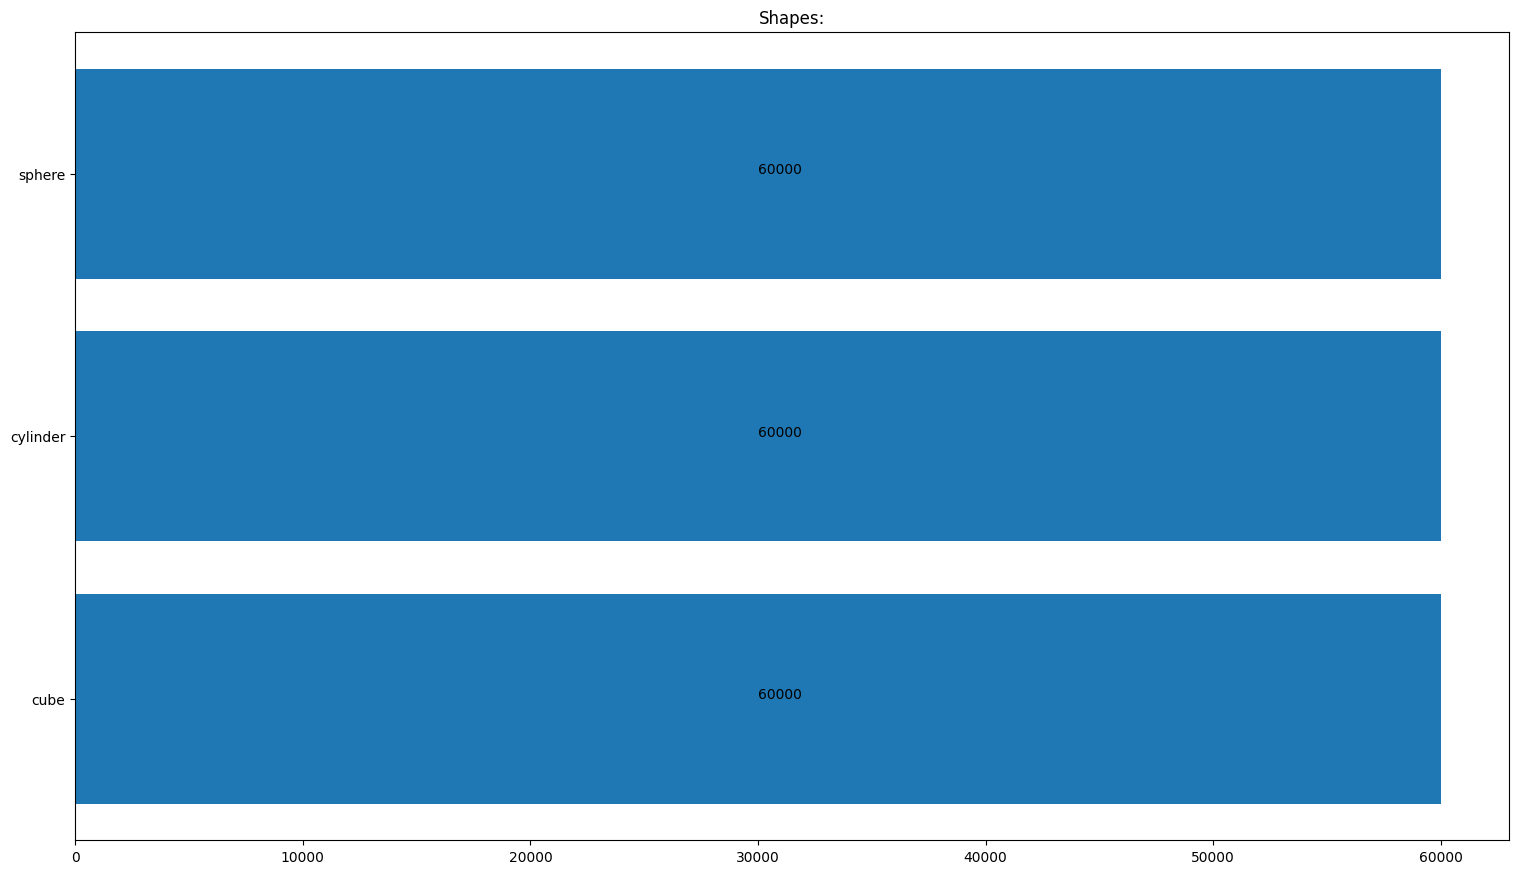

In [79]:
groups = df.groupby('shape').count().image.to_dict()
draw_simple_diagram(groups, "Shapes:")

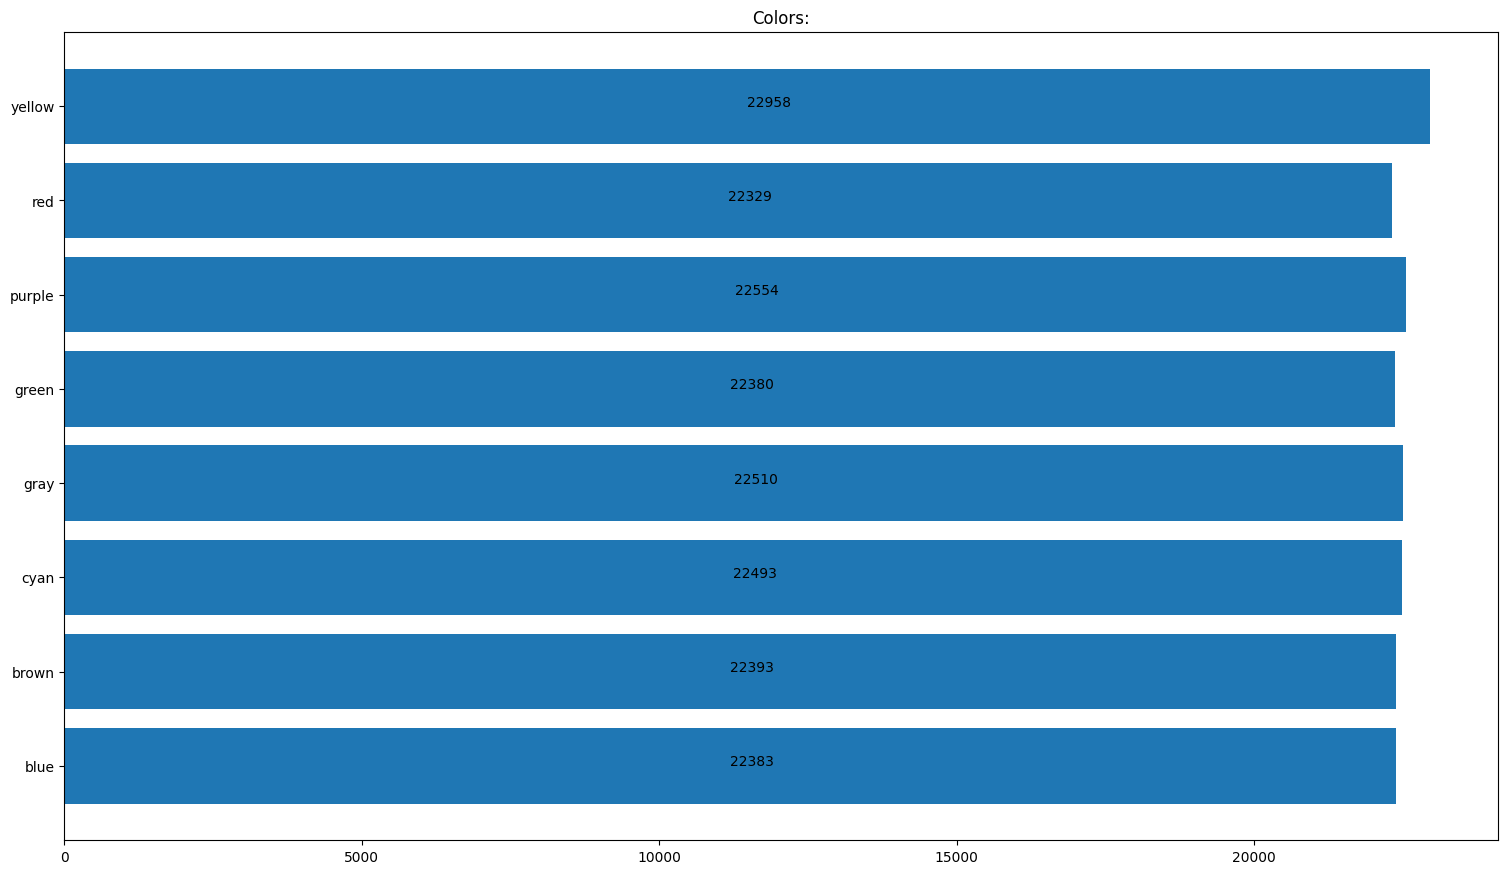

In [80]:
groups = df.groupby('color').count().image.to_dict()
draw_simple_diagram(groups, "Colors:")

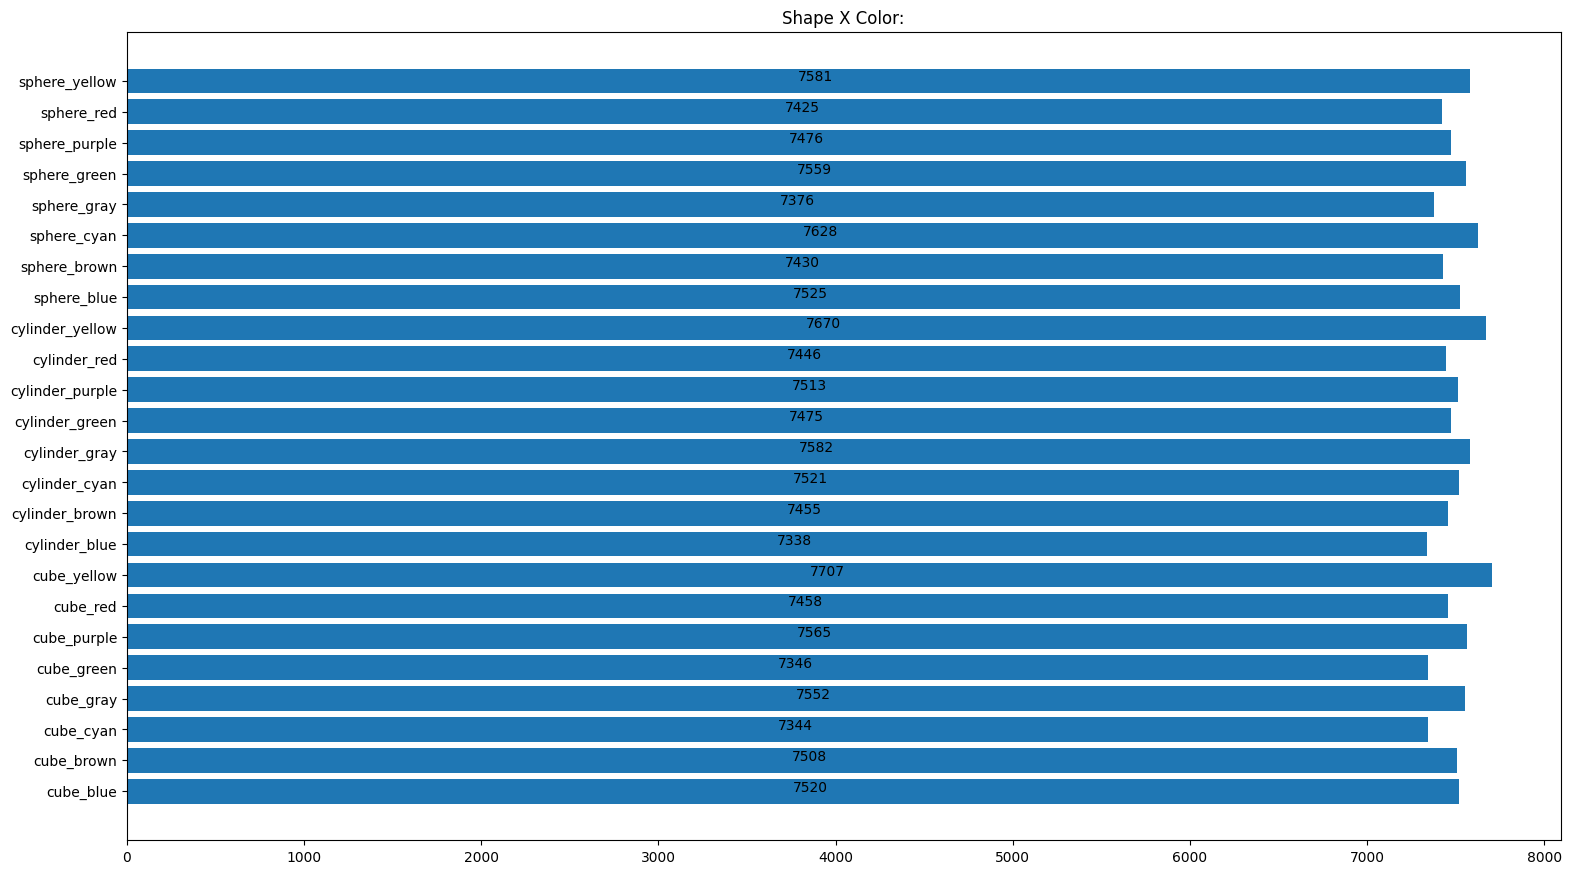

In [81]:

groups = df.groupby(['shape', 'color']).count().image.to_dict()
groups = {"_".join(k):v for k,v in groups.items()}

draw_simple_diagram(groups, "Shape X Color:")

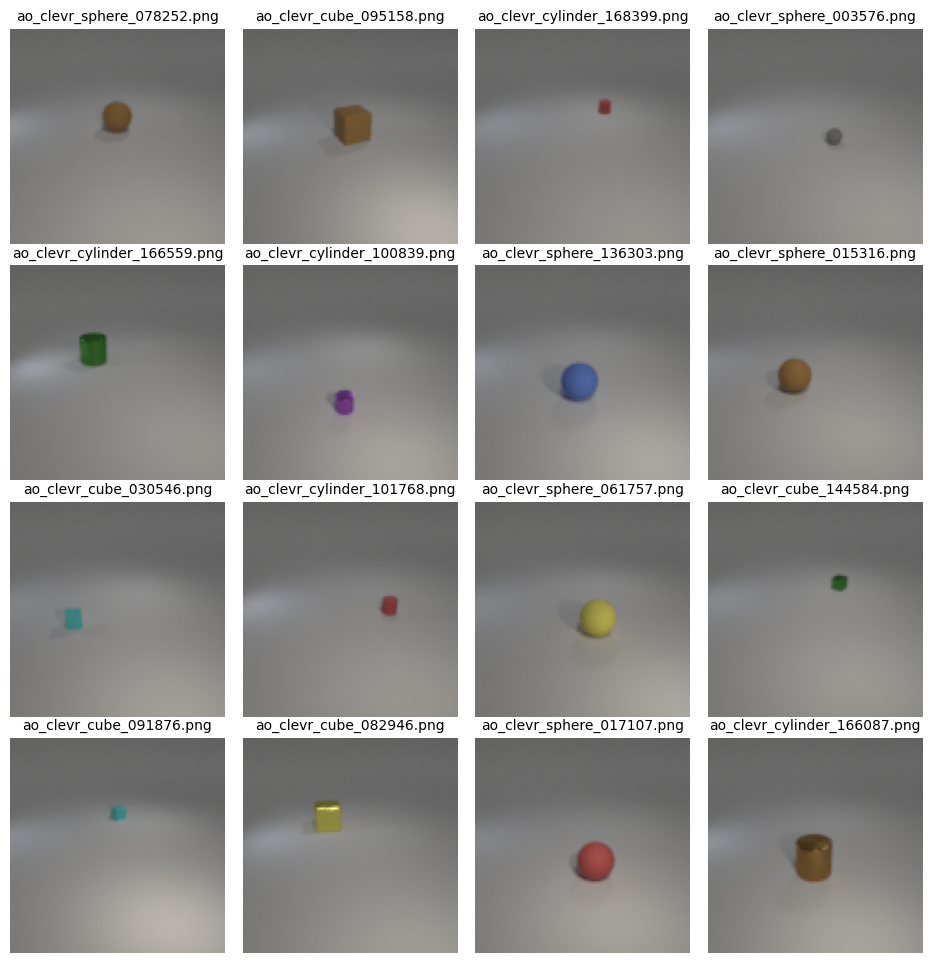

In [121]:
images = next(walk("images/"), (None, None, []))[2]
images = random.sample(images, 16)

_, axs = plt.subplots(4, 4, figsize=(12, 12))
axs = axs.flatten()
for img_name, ax in zip(images, axs):
    img = mpimg.imread(f"images/{img_name}")
    ax.title.set_text(img_name)
    ax.title.set_size(10)
    ax.axis('off')
    ax.imshow(img)


plt.subplots_adjust(wspace=0, hspace=0.1)
plt.show()
